In [1]:
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Use a relative path to the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dataset')

# Walk through the dataset directory
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\078f8f88971426ae729d919ce11e6942.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\0df505fa53491a9ac49ba2f00de22f2d.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\1d66809eff05a23dab38d79ec34777fc.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\20c478f272d5d14015eab8170563a454.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\3b6b2134568dd116206bf7ff59e7c1bd.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\4013de6cc22838cd0ab14fd242ecbd84.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\53b07aa2b907885a963ba95ee2ae1aa7.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago School\57a48b2cf75cac21cd042d06257d326f.jpg
d:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Chicago 

In [2]:
import python_splitter
# If you want to create only Train-Test Folder(not Validation Folder)
# python_splitter.split_from_folder(r"D:\Real Estate\House_Style_Project\House_style_ML\dataset", train = 0.7, test = 0.3)
# Define the dataset folder relative to the script's current directory
# dataset_dir = os.path.join(os.getcwd(), 'dataset')

# Split the dataset into training and testing sets
# 70% training, 30% testing
python_splitter.split_from_folder(os.path.join(os.getcwd(), 'dataset'), train=0.7, test=0.3)

✅Checking SOURCE directory...
0.7 0 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
target_img_shape = (224,224)
# train_dir = r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\train'
# val_dir = r'D:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\test'
# base_dir = os.path.join(os.getcwd(), 'Train_Test_Folder')

# Define train and validation directories
train_dir = os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder'), 'train')
val_dir = os.path.join(os.path.join(os.getcwd(), 'Train_Test_Folder'), 'test')

In [5]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_set = train_datagen.flow_from_directory(train_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

# #Augmenting training data with transformations
# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=15,      # Randomly rotate images by 20 degrees
#     width_shift_range=0.3,  # Randomly shift images horizontally (15% of the width)
#     height_shift_range=0.3, # Randomly shift images vertically (15% of the height)
#     shear_range=0.9,       # Randomly apply shearing
#     zoom_range=0.1,        # Randomly zoom inside pictures
#     horizontal_flip=True,   # Randomly flip images horizontally
#     fill_mode='nearest'     # Fill pixels when the image is rotated or shifted
# )

# train_set = train_datagen.flow_from_directory(
#     train_dir, 
#     target_size=target_img_shape, 
#     batch_size=32, 
#     class_mode='sparse'
# )

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_set = val_datagen.flow_from_directory(val_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

Found 286 images belonging to 13 classes.


Found 129 images belonging to 13 classes.


In [6]:
print(train_set.class_indices)
for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)

    img = image_batch[0] - image_batch[0].min()
    img /= 275.0
    # plt.imshow(img)
    print('class', labels_batch[0])
    break

{'ML-AR-COLONIAL': 0, 'ML-AR-Chicago School': 1, 'ML-AR-Classic': 2, 'ML-AR-MEDITERRANEAN': 3, 'ML-AR-MID CENTURY': 4, 'ML-AR-Modern': 5, 'ML-AR-Modern Minimal': 6, 'ML-AR-Oriental': 7, 'ML-AR-SCANDINAVIAN': 8, 'ML-AR-THAI': 9, 'ML-AR-TRANSITIONAL': 10, 'ML-AR-TUDOR HOUSE': 11, 'ML-AR-VICTORIAN': 12}
(32, 224, 224, 3)
(32,)
class 8.0


In [7]:
ids, counts = np.unique(train_set.classes, return_counts = True)
print(ids)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[20 20 20 20 26 11 20 20 20 37 20 32 20]


In [8]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>8} = {}'.format(labels[i], counts[i]))

ML-AR-COLONIAL = 20
ML-AR-Chicago School = 20
ML-AR-Classic = 20
ML-AR-MEDITERRANEAN = 20
ML-AR-MID CENTURY = 26
ML-AR-Modern = 11
ML-AR-Modern Minimal = 20
ML-AR-Oriental = 20
ML-AR-SCANDINAVIAN = 20
ML-AR-THAI = 37
ML-AR-TRANSITIONAL = 20
ML-AR-TUDOR HOUSE = 32
ML-AR-VICTORIAN = 20


In [9]:
import keras
from keras import layers
from keras import ops

import os
import numpy as np
from glob import glob
import cv2
from scipy.io import loadmat
import matplotlib.pyplot as plt

# For data preprocessing
from tensorflow import image as tf_image
from tensorflow import data as tf_data
from tensorflow import io as tf_io

In [10]:
IMAGE_SIZE = 224
BATCH_SIZE = 4
NUM_CLASSES = 13
# DATA_DIR = "./instance-level_human_parsing/instance-level_human_parsing/Training"
# NUM_TRAIN_IMAGES = 1000
# NUM_VAL_IMAGES = 50

# train_images = sorted(glob(os.path.join(DATA_DIR, "Images/*")))[:NUM_TRAIN_IMAGES]
# train_masks = sorted(glob(os.path.join(DATA_DIR, "Category_ids/*")))[:NUM_TRAIN_IMAGES]
# val_images = sorted(glob(os.path.join(DATA_DIR, "Images/*")))[
#     NUM_TRAIN_IMAGES : NUM_VAL_IMAGES + NUM_TRAIN_IMAGES
# ]
# val_masks = sorted(glob(os.path.join(DATA_DIR, "Category_ids/*")))[
#     NUM_TRAIN_IMAGES : NUM_VAL_IMAGES + NUM_TRAIN_IMAGES
# ]


def read_image(image_path, mask=False):
    image = tf_io.read_file(image_path)
    if mask:
        image = tf_image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf_image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    else:
        image = tf_image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf_image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    return image

# def read_image(image_path, mask=False):
#     # Read the image file
#     image = tf.io.read_file(image_path)
    
#     # Dynamically decode the image
#     image = tf.image.decode_image(image, channels=1 if mask else 3, expand_animations=False)
    
#     # Set the shape for the decoded image
#     image.set_shape([None, None, 1 if mask else 3])
    
#     # Resize the image to target dimensions
#     image = tf.image.resize(image, size=[224, 224])
    
#     return image


def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask = read_image(mask_list, mask=True)
    return image, mask


def data_generator(image_list, mask_list):
    dataset = tf_data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf_data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset


train_dataset = train_set
val_dataset = val_set

print("Train Dataset:", train_dataset)
print("Val Dataset:", val_dataset)

Train Dataset: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x0000022DF64F9250>
Val Dataset: <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x0000022D84228F50>


# Mask generation process

In [27]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Load the pretrained model
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)

# Paths
train_image_dir = "Train_Test_Folder/train"
train_mask_dir = "Train_Test_Folder/mask"

# Assign unique class labels
class_labels = {class_name: idx for idx, class_name in enumerate(sorted(os.listdir(train_image_dir)))}
print("Class Labels Mapping:", class_labels)
# Create mask directory if it doesn't exist
os.makedirs(train_mask_dir, exist_ok=True)

def predict_mask(image_path):
    """Generate a segmentation mask for the given image."""
    img = cv2.imread(image_path)
    img = cv2.resize(img, (4096, 4096)) / 255.0
    img = np.expand_dims(img, axis=0)

    predictions = model.predict(img)
    mask = np.argmax(predictions[0], axis=-1)  # Convert probabilities to class indices
    return mask

def process_images_in_class(class_folder, output_folder):
    """Generate masks for all images in a class folder."""
    class_name = os.path.basename(class_folder)
    class_mask_dir = os.path.join(output_folder, class_name)

    # Create class-specific mask directory
    os.makedirs(class_mask_dir, exist_ok=True)

    for filename in os.listdir(class_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(class_folder, filename)
            mask = predict_mask(image_path)
            mask_filename = os.path.join(class_mask_dir, os.path.splitext(filename)[0] + "_mask.png")
            cv2.imwrite(mask_filename, mask)

# Iterate through each class folder in train directory
for class_name in os.listdir(train_image_dir):
    class_folder = os.path.join(train_image_dir, class_name)
    if os.path.isdir(class_folder):
        process_images_in_class(class_folder, train_mask_dir)

print("Segmentation masks created and saved in the mask directory.")


C:\Users\Archiculture01\AppData\Local\Temp\ipykernel_10940\680135366.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)


Class Labels Mapping: {'ML-AR-COLONIAL': 0, 'ML-AR-Chicago School': 1, 'ML-AR-Classic': 2, 'ML-AR-MEDITERRANEAN': 3, 'ML-AR-MID CENTURY': 4, 'ML-AR-Modern': 5, 'ML-AR-Modern Minimal': 6, 'ML-AR-Oriental': 7, 'ML-AR-SCANDINAVIAN': 8, 'ML-AR-THAI': 9, 'ML-AR-TRANSITIONAL': 10, 'ML-AR-TUDOR HOUSE': 11, 'ML-AR-VICTORIAN': 12}
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 2

In [19]:
import glob

# Load image and mask paths
train_image_paths = sorted(glob.glob(f"{train_dir}/*/*.jpg"))
train_mask_paths = [path.replace("train", "mask").replace(".jpg", ".png") for path in train_image_paths]

# Example: Print the first image-mask pair
for img_path, mask_path in zip(train_image_paths, train_mask_paths):
    print(f"Image: {img_path}, Mask: {mask_path}")


Image: d:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\train\ML-AR-COLONIAL\0393e5ac9134ac35e637785a9bc200b3.jpg, Mask: d:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\mask\ML-AR-COLONIAL\0393e5ac9134ac35e637785a9bc200b3.png
Image: d:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\train\ML-AR-COLONIAL\046b8ae53ddcaa1ee95a788450b1751a.jpg, Mask: d:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\mask\ML-AR-COLONIAL\046b8ae53ddcaa1ee95a788450b1751a.png
Image: d:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\train\ML-AR-COLONIAL\08aa994b04a4e98d9fe211b88106abb6.jpg, Mask: d:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\mask\ML-AR-COLONIAL\08aa994b04a4e98d9fe211b88106abb6.png
Image: d:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Folder\train\ML-AR-COLONIAL\1c6f1019104d7e4d49bb4254121c8ea1.jpg, Mask: d:\Real Estate\House_Style_Project\House_style_ML\Train_Test_Fold

In [23]:
import tensorflow as tf
import os

# Paths
train_image_dir = "Train_Test_Folder/train"
train_mask_dir = "Train_Test_Folder/mask"

# Fixed image size
image_size = (224, 224)

# Function to load and preprocess images
def load_image_and_mask(image_path, mask_path):
    # Load and decode the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, image_size)  # Resize image
    image = image / 255.0  # Normalize to [0, 1]
    
    # Load and decode the mask
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)  # Masks are grayscale
    mask = tf.image.resize(mask, image_size, method="nearest")  # Resize mask
    mask = tf.cast(mask, tf.int32)  # Ensure mask has integer values
    
    return image, mask

# Get all image and mask file paths
image_paths = tf.io.gfile.glob(f"{train_image_dir}/*/*.jpg")
mask_paths = [path.replace("train", "mask").replace(".jpg", ".png") for path in image_paths]

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))
dataset = dataset.map(load_image_and_mask, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.shuffle(buffer_size=100).batch(16).prefetch(buffer_size=tf.data.AUTOTUNE)


In [21]:
from tensorflow.keras import layers, Model

def unet_model(input_size=(224, 224, 3), num_classes=3):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(p1)
    c2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    b1 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(p2)
    b1 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(b1)

    # Decoder
    u2 = layers.UpSampling2D((2, 2))(b1)
    u2 = layers.Concatenate()([u2, c2])
    c3 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(u2)
    c3 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(c3)

    u3 = layers.UpSampling2D((2, 2))(c3)
    u3 = layers.Concatenate()([u3, c1])
    c4 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(u3)
    c4 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(c4)

    outputs = layers.Conv2D(num_classes, (1, 1), activation="softmax")(c4)

    return Model(inputs, outputs)


In [24]:
# Compile the model
model = unet_model(input_size=(224, 224, 3), num_classes=len(class_labels))
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Sparse CE is used for integer masks
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    dataset,
    epochs=1,
    validation_data=dataset.take(10)  # Use part of the dataset for validation
)


NotFoundError: Graph execution error:

Detected at node ReadFile_1 defined at (most recent call last):
<stack traces unavailable>
Error in user-defined function passed to ParallelMapDatasetV2:12883 transformation with iterator: Iterator::Root::Prefetch::BatchV2::Shuffle::ParallelMapV2: NewRandomAccessFile failed to Create/Open: Train_Test_Folder\mask\ML-AR-COLONIAL\0393e5ac9134ac35e637785a9bc200b3.png : The system cannot find the file specified.
; No such file or directory
	 [[{{node ReadFile_1}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_63117]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


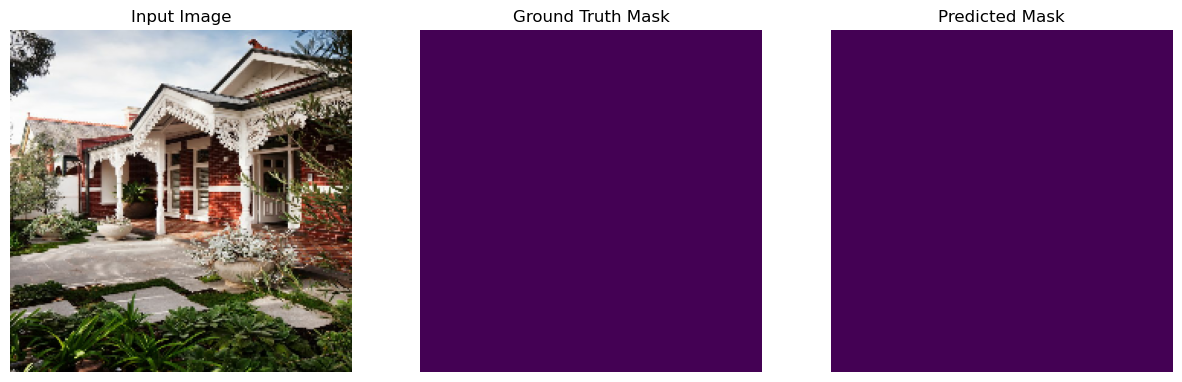

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and masks
for images, masks in dataset.take(1):
    preds = model.predict(images)
    preds = tf.argmax(preds, axis=-1).numpy()  # Convert probabilities to class labels
    masks = tf.squeeze(masks, axis=-1).numpy()

    # Display the first image, mask, and prediction
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(images[0])
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(masks[0])
    plt.title("Ground Truth Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(preds[0])
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.show()
    break
